In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import json

In [16]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D;
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow import keras

from tensorflow.keras.models import model_from_json

In [17]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16028163811110336947
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5949620224
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15515918614335368368
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [18]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [19]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
print(tf.__version__)

2.9.0


In [21]:
with open("tokenizer.json", "r") as jsonfile:
    tokenizer = json.load(jsonfile)

tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenizer)

In [22]:
with open("dados/assuntoTratado.csv", "r") as csvfile:
    assuntos = np.genfromtxt(csvfile, delimiter=",")
    assuntos = assuntos.astype(np.int32)

In [23]:
with open("dados/conteudoTratado.csv", "r") as csvfile:
    conteudos = np.genfromtxt(csvfile, delimiter=",")
    conteudos = conteudos.astype(np.int32)

In [24]:
vocab = len(tokenizer.word_index)

In [25]:
maxContent = max(len(tokens) for tokens in conteudos)
maxSubject = len(np.unique(assuntos))

In [26]:
assuntos = pd.get_dummies(assuntos).values

In [27]:
size = len(conteudos)

xTrain = conteudos[0:int(size*0.7)]
yTrain = assuntos[0:int(size*0.7)]

xVal = conteudos[int(size*0.7):int(size*0.8)]
yVal = assuntos[int(size*0.7):int(size*0.8)]

xTest = conteudos[int(size*0.8):]
yTest = assuntos[int(size*0.8):]

In [28]:
vocab

92754

In [29]:
model = Sequential()

model.add(Embedding(vocab, 256, input_length = maxContent)),
model.add(Conv1D(64, 3, activation = "relu")),
model.add(MaxPooling1D(3)),
model.add(Conv1D(32, 3, activation = "relu")),
model.add(GlobalMaxPooling1D()),
model.add(Dense(5, activation = "softmax"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5476, 256)         23745024  
                                                                 
 conv1d (Conv1D)             (None, 5474, 64)          49216     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1824, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1822, 32)          6176      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 1

In [31]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [32]:
subjectModel = 'subjectModel.h5'
subjectModelJson = 'subjectModel.json'

In [19]:
modeljson = model.to_json()
with open(subjectModelJson, 'w') as json_file:
  json_file.write(modeljson)

In [20]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor = 0.9, patience=3, verbose = 1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience = 8, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(subjectModel, monitor='val_loss', verbose = 1, save_best_only=True)

In [21]:
neuralNetwork = model.fit(xTrain, yTrain, validation_data = (xVal, yVal), epochs=20, batch_size=1, callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/20
7072/7072 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9036
Epoch 1: val_loss improved from inf to 0.29737, saving model to subjectModel.h5
7072/7072 [==============================] - 155s 22ms/step - loss: 0.2873 - accuracy: 0.9036 - val_loss: 0.2974 - val_accuracy: 0.9021 - lr: 0.0010
Epoch 2/20
7071/7072 [============================>.] - ETA: 0s - loss: 0.0901 - accuracy: 0.9717
Epoch 2: val_loss did not improve from 0.29737
7072/7072 [==============================] - 149s 21ms/step - loss: 0.0900 - accuracy: 0.9717 - val_loss: 0.3032 - val_accuracy: 0.9199 - lr: 0.0010
Epoch 3/20
7071/7072 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9900
Epoch 3: val_loss did not improve from 0.29737
7072/7072 [==============================] - 142s 20ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 1.0872 - val_accuracy: 0.8388 - lr: 0.0010
Epoch 4/20
7072/7072 [==============================] - ETA: 0s - loss: 0.0215 - accu

In [33]:
plt.plot(neuralNetwork.history['loss'], label = 'loss')
plt.plot(neuralNetwork.history["val_loss"], label = "validation loss")
plt.legend()

NameError: name 'neuralNetwork' is not defined

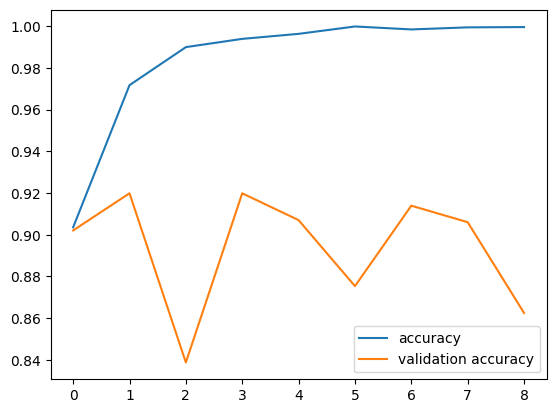

In [ ]:
plt.plot(neuralNetwork.history['accuracy'], label = 'accuracy')
plt.plot(neuralNetwork.history["val_accuracy"], label = "validation accuracy")
plt.legend()

In [34]:
from tensorflow.keras.models import model_from_json

with open('modelo/subjectModel.json', 'r') as json_file:
  model = model_from_json(json_file.read())

model = tf.keras.models.load_model('modelo/subjectModel.h5')

In [35]:
assuntoTxt = ["economia", "esportes", "politica", "famosos","tecnologia"]

In [36]:
idx = 0

In [37]:
inputPred = xTest[idx].reshape(1, maxContent)

In [38]:
tokenizer.sequences_to_texts(inputPred)

['logo após vencer sua quarta liga dos campeões com o real madrid o atacante cristiano ronaldo deu a entender que a vitória sobre o liverpool neste sábado pode ter sido sua última partida pelo clube espanhol o importante era ganhar e entrar na história isso era o importante agora é hora de aproveitar o momento vou comemorar e nos dias seguintes darei uma resposta aos torcedores que estão sempre do meu lado foi muito bonito estar no real madrid disse o camisa 7 ao canal bein sports o repórter perguntou então se a resposta era uma despedida e o craque fez mais mistério o programa el chiringuito de grande repercussão na espanha também abordou cristiano após a entrevista ao bein e o questionou se o craque tem dúvidas sobre o futuro não tenho dúvidas isso não é importante de verdade é hora de aproveitar descansar e ir para a seleção na próxima semana já veremos o que acontecerá o importante é a história que o real fez o camisa 7 aproveitou ainda a conversa com o el chiringuito para tirar on

In [39]:
prediction = model.predict(inputPred)

1/1 [==============================] - 1s 883ms/step


In [40]:
prediction

array([[7.9191568e-07, 9.9933356e-01, 7.0126957e-06, 6.3864392e-04,
        1.9915127e-05]], dtype=float32)

In [41]:
assuntoTxt[yTest[idx].argmax()]

'esportes'

In [42]:
assuntoTxt[prediction.argmax()]

'esportes'

In [43]:
scores = model.evaluate([xTest[0:2019]], [yTest[0:2019]])

64/64 [==============================] - 2s 24ms/step - loss: 0.2713 - accuracy: 0.9054


In [44]:
scores

[0.27128589153289795, 0.9053987264633179]

In [88]:
yPred = []
for x in xTest:

    yPred.append(       
        model.predict(x.reshape(1, maxContent))[0].argmax()   
        )
    

1/1 [==============================] - 0s 15ms/step


In [106]:
yTestNumeric = []

for y in yTest:
    yTestNumeric.append(y.argmax())

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [108]:
for y in range(len(yPred)):
    print("test: ", yTestNumeric[y], "pred: ", yPred[y])

test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 pred:  1
test:  1 p

In [113]:
confMatrix = confusion_matrix(yTestNumeric, yPred)

In [114]:
confMatrix

array([[426,   8,  20,   0,  35],
       [  0, 628,   0,   1,   0],
       [ 65,   2, 416,   0,   2],
       [  1,  12,   0, 207,   8],
       [ 30,   6,   2,   0, 152]], dtype=int64)

In [153]:
totals = np.sum(confMatrix[:], axis=1)
trues = []

for i in range(5):
    trues.append(confMatrix[i][i])

(totals-trues)/totals*100

array([12.88343558,  0.15898251, 14.22680412,  9.21052632, 20.        ])

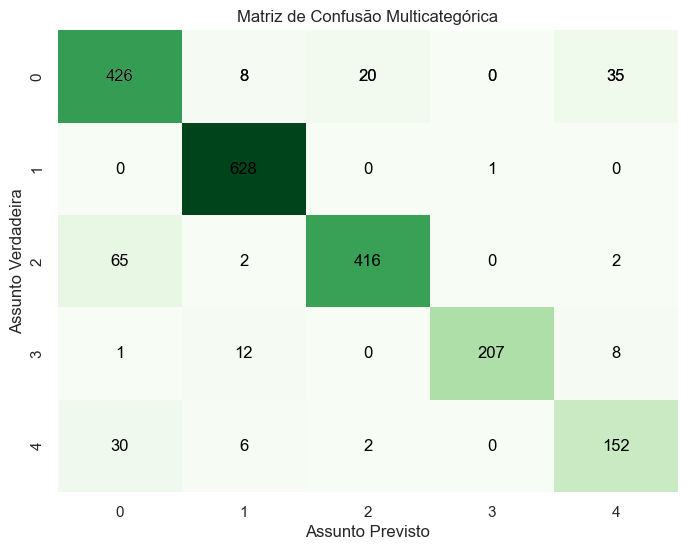

In [154]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(confMatrix, annot=True, fmt="d", cmap="Greens", cbar=False)

plt.title('Matriz de Confusão Multicategórica')
plt.xlabel('Assunto Previsto')
plt.ylabel('Assunto Verdadeira')

for i in range(len(confMatrix)):
    for j in range(len(confMatrix)):
        plt.text(j + 0.5, i + 0.5, confMatrix[i, j],
                 ha='center', va='center', color='black')

plt.show()

In [133]:
assuntoTxt

['economia', 'esportes', 'politica', 'famosos', 'tecnologia']